<a href="https://colab.research.google.com/github/hong126-ch/CIS5450/blob/main/13_Module_3_Notebook_I_DimReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Tests

We saw in the previous notebook how the t-test works. Here let's look at comparing distributions of two categorical attributes.

In [1]:
import pandas as pd

voters_df = pd.DataFrame([{"gender": "male", "republican": 120, "democrat": 90, "independent": 40}, \
                          {"gender": "female", "republican": 110, "democrat": 95, "independent": 45}])

voters_df.set_index("gender", inplace=True)

voters_df


,republican,democrat,independent
gender,,,
male,120,90,40
female,110,95,45


In [2]:
import scipy.stats as stats

# The "contingency table" shows
result = stats.chi2_contingency(voters_df)

print(f"Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] < 0.05:
  print("Statistically significant")
else:
  print("Not statistically significant")

Statistic: 0.8640353908896108
p-value: 0.6491978887380976
Not statistically significant


# Reducing Dimensionality



## Autograder setup

In [3]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 64660501 # YOUR PENN-ID GOES HERE AS AN INTEGER##PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO

In [4]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [5]:
%set_env HW_ID=cis5450_25f_HW9

env: HW_ID=cis5450_25f_HW9


In [6]:
!pip3 install penngrader-client

In [7]:
import os
from penngrader.grader import *

grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 64660501

Make sure this correct or we will not be able to store your grade


## Looking at Glass

In [8]:
# Glass data from https://archive.ics.uci.edu/ml/machine-learning-databases/glass/

In [9]:
!wget https://archive.ics.uci.edu/static/public/42/glass+identification.zip

--2025-10-27 08:01:33--  https://archive.ics.uci.edu/static/public/42/glass+identification.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘glass+identification.zip’

glass+identificatio     [ <=>                ]   6.23K  --.-KB/s    in 0s      

2025-10-27 08:01:34 (63.1 MB/s) - ‘glass+identification.zip’ saved [6380]



In [10]:
!unzip glass+identification.zip

Archive:  glass+identification.zip
  inflating: Index                   
  inflating: glass.data              
  inflating: glass.names             
  inflating: glass.tag               


In [11]:
# Load into a dataframe, with the header in row 0
import pandas as pd

glass_df = pd.read_csv('glass.data',header=None,names=['ID','RefractiveIndex','Na','Mg','Al','Si','K','Ca','Ba','Fe','Label'])

glass_df

,ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Label
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Exploratory Data Analysis

Let's do some "EDA" - exploratory data analysis.  Typically that involves getting a sense of the fields, distirbutions, missing values, correlations, and more.

In [12]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               214 non-null    int64  
 1   RefractiveIndex  214 non-null    float64
 2   Na               214 non-null    float64
 3   Mg               214 non-null    float64
 4   Al               214 non-null    float64
 5   Si               214 non-null    float64
 6   K                214 non-null    float64
 7   Ca               214 non-null    float64
 8   Ba               214 non-null    float64
 9   Fe               214 non-null    float64
 10  Label            214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [13]:
# What are the data distributions within each column?
glass_df.describe()

,ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Label
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Observe the really wide differences between means, value ranges, and more across the different elements and the refractive index.

Any missing values?

In [14]:
glass_df.isnull().sum()

,0
ID,0
RefractiveIndex,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0


No -- that's good!

Now let's look at the value distributions relative to each other...

In [15]:
glass_df.set_index('ID')
glass_types_df = glass_df[['Label']]

# We don't really need these
glass_df = glass_df.drop(columns=['ID', 'Label'])

display(glass_df)
display(glass_types_df)

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


,Label
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


<Axes: xlabel='Label'>

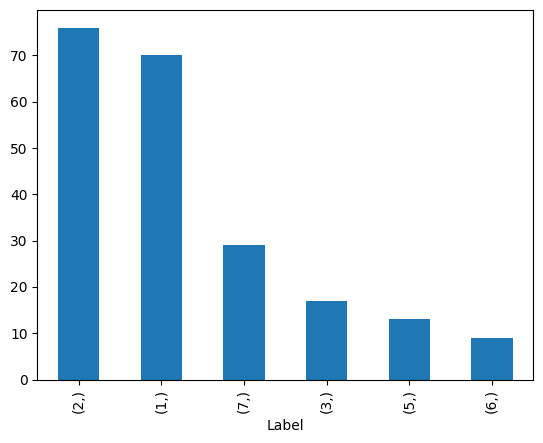

In [16]:
# Let's see the popularity of each label...

glass_types_df.value_counts().plot(kind='bar')

Observe that some values, e.g., 4, don't have any instances.

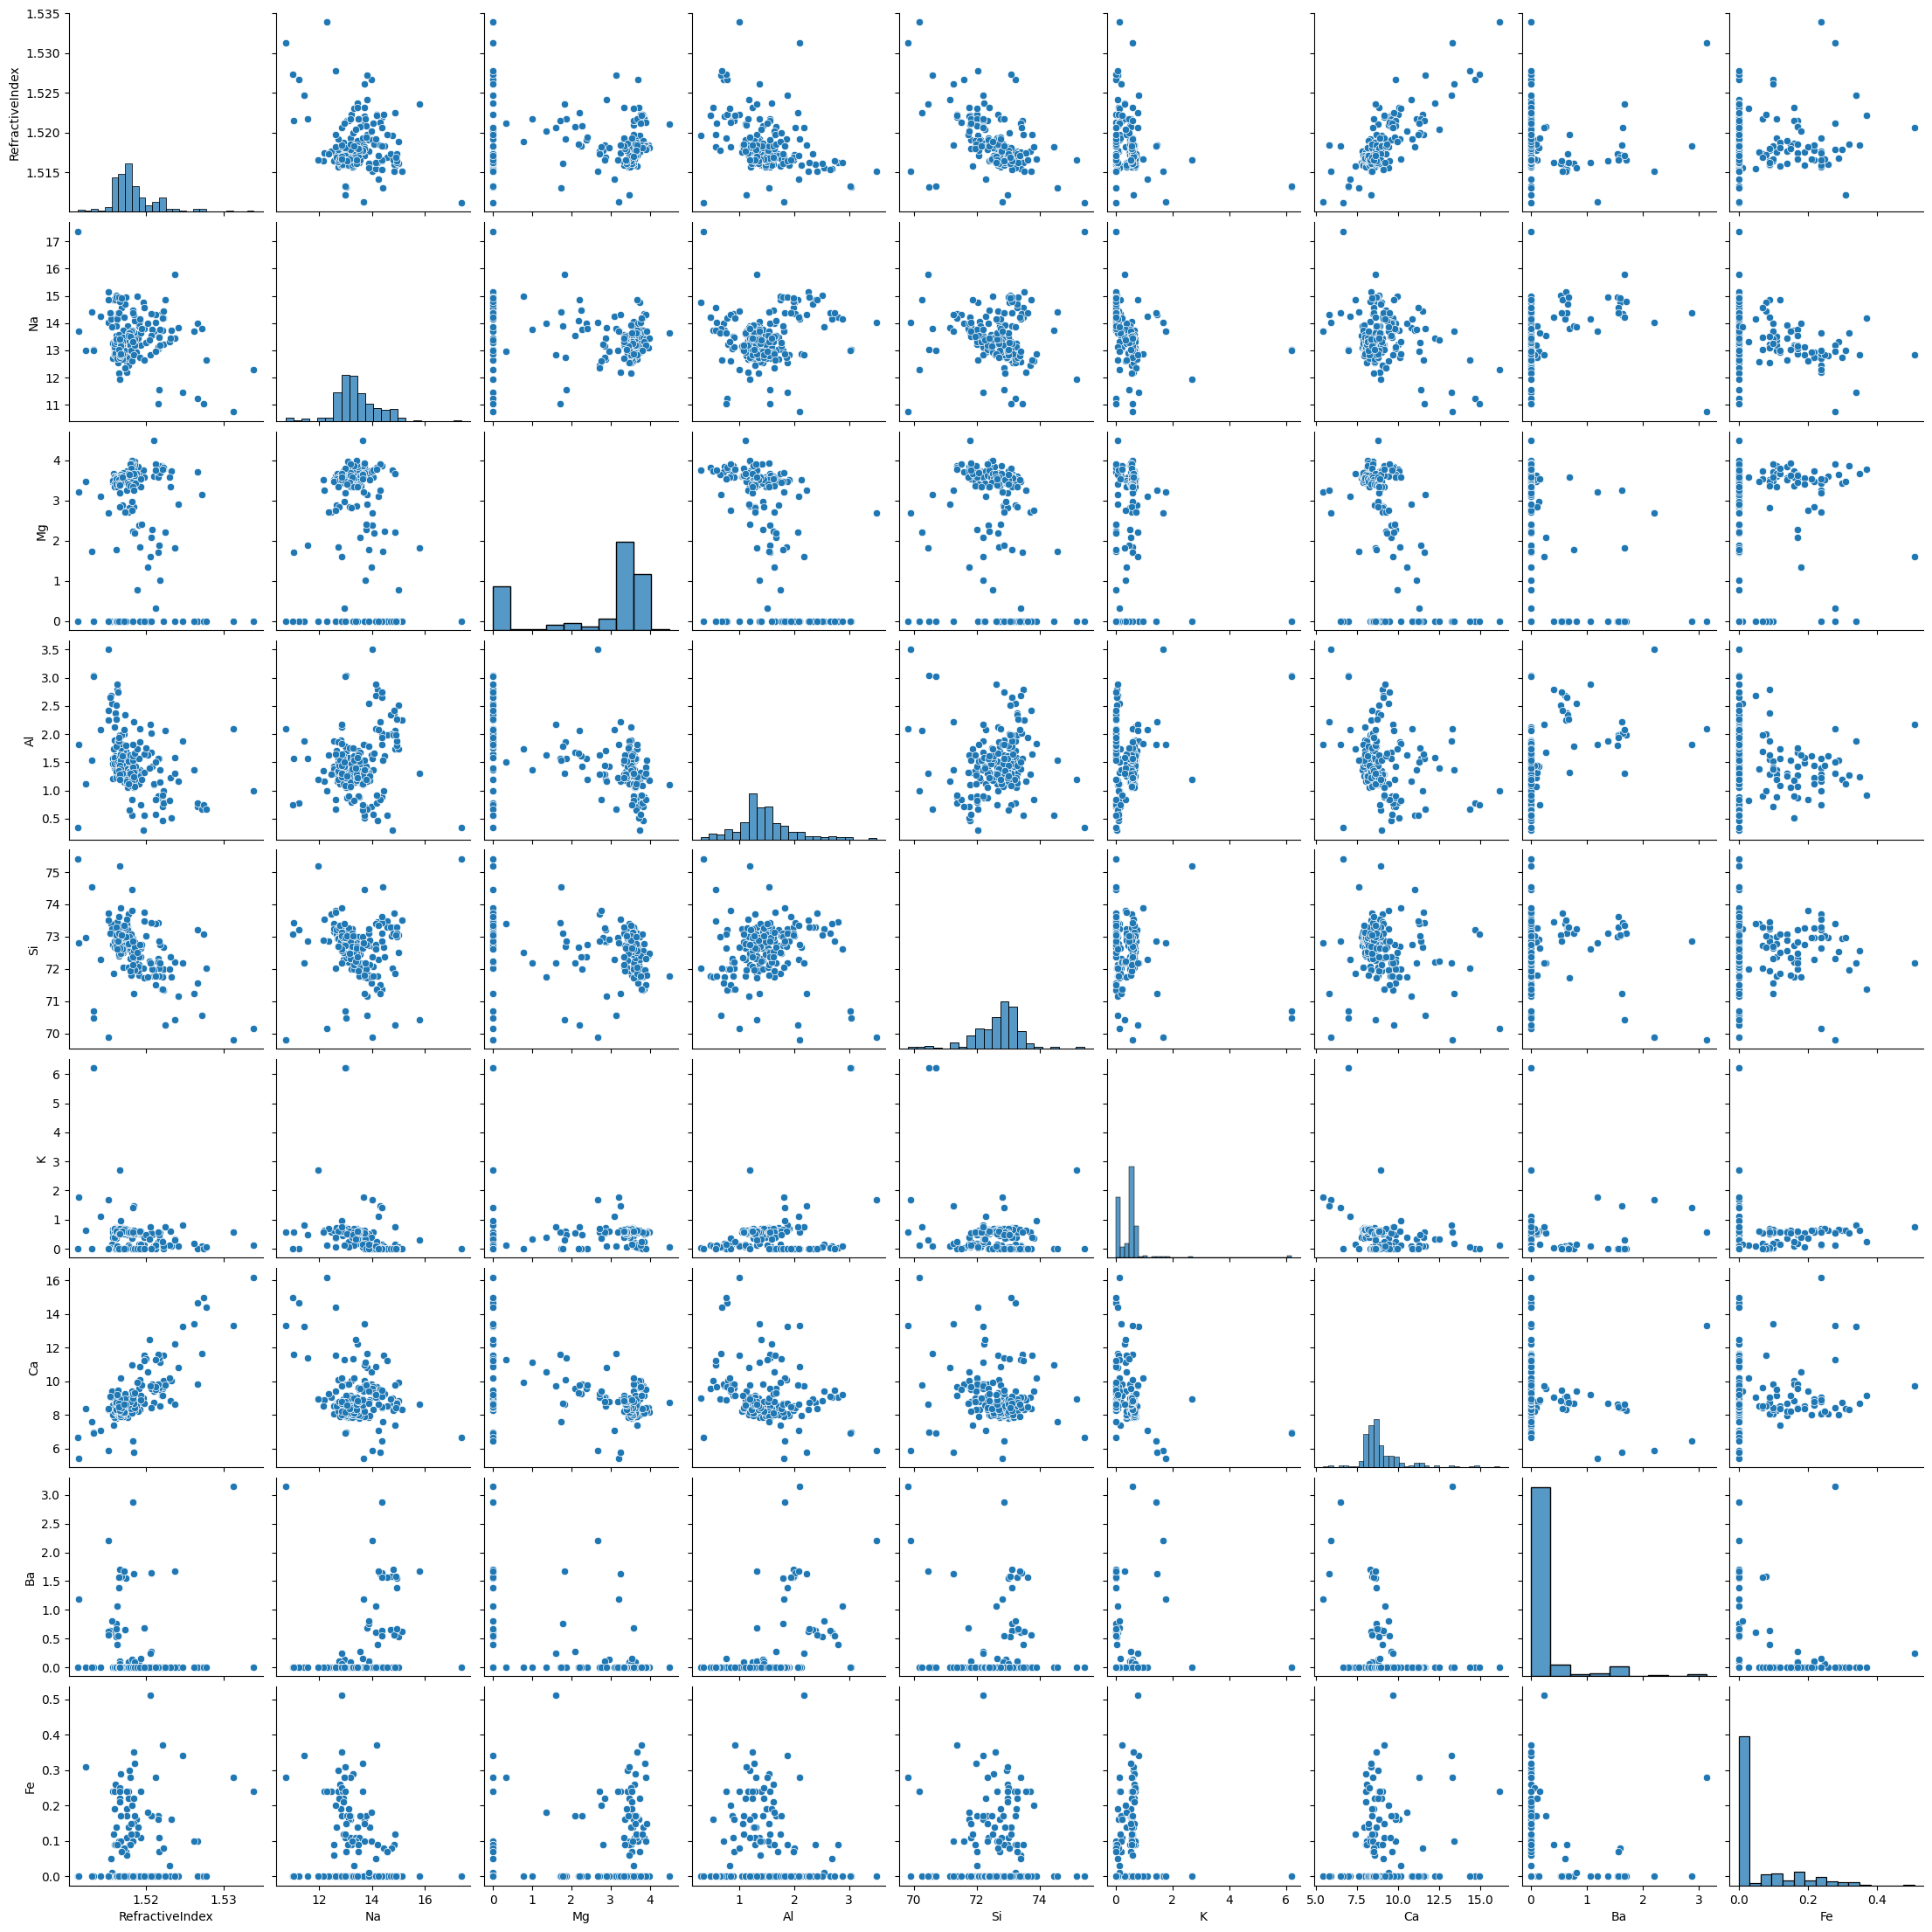

In [17]:
# A Pairplot of every item vs every other item
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(glass_df)

<Axes: >

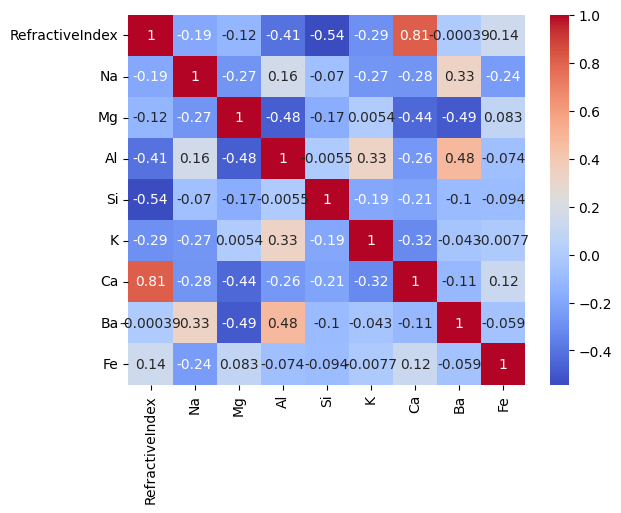

In [18]:
corr_matrix = glass_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Observe that some of the features are fairly (anti-)correlated, e.g., Ba and Mg.

## Unsupervised Machine Learning!

We typically set up machine learning problems as follows.

1. Convert from categorical and other values into numeric values
2. Convert from dataframes to arrays
3. Separate out any classes / labels (like glass type)

We will call the *input data*  $X$ and the *labels* $y$.

In [19]:
# Set up the problem

X = glass_df.to_numpy()
y = glass_types_df.to_numpy()

In [20]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [21]:
import numpy as np

# This is the covariance matrix
np.cov(X)

array([[537.19456576, 544.5834414 , 546.40038381, ..., 550.32002818,
        551.95594176, 549.65686161],
       [544.5834414 , 552.32819438, 554.17730296, ..., 558.4880113 ,
        560.13982548, 557.79483801],
       [546.40038381, 554.17730296, 556.05657685, ..., 560.37732108,
        562.03250935, 559.68839175],
       ...,
       [550.32002818, 558.4880113 , 560.37732108, ..., 566.82091621,
        568.47240058, 566.13976147],
       [551.95594176, 560.13982548, 562.03250935, ..., 568.47240058,
        570.12993446, 567.78943337],
       [549.65686161, 557.79483801, 559.68839175, ..., 566.13976147,
        567.78943337, 565.46570209]])

Let's look at a couple of dimensions within the data...

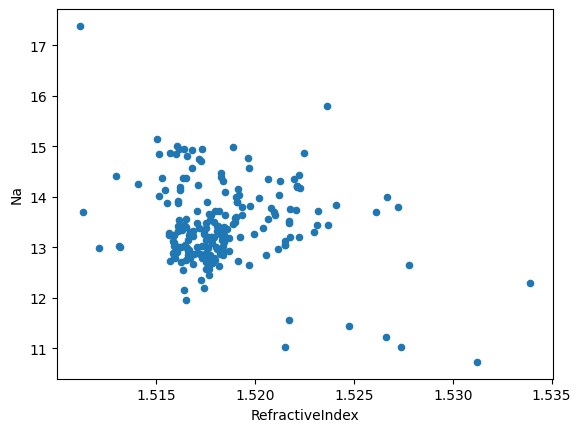

In [22]:
import matplotlib
import matplotlib.pyplot as plt

fig1 = glass_df.plot.scatter(x='RefractiveIndex',y='Na')

## Applying PCA

Let's first scale the data (by removing the mean and scaling by unit variance).

In [23]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features based on unit variance
X = StandardScaler().fit_transform(X)

print (X.shape)
print(X)

(214, 9)
[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


Now we'll re-plot our two dimensions

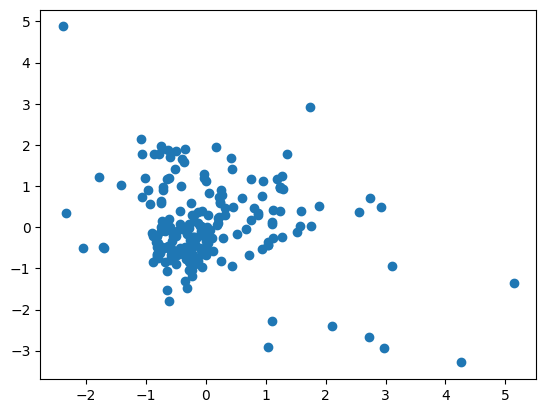

In [24]:
# Re-plotting now with the mean at the center!
plt.scatter(X[:,0], X[:,1])

## Actually Running PCA

We'll use, for the first time, a standard sckikit-learn 'flow': create a model, `fit` it, and `transform` the data.

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
X2 = pca.fit_transform(X)

In [26]:
# Let's see the components. There are p of them, each with p elements
pca.components_

array([[ 0.54517662, -0.2581256 ,  0.11088095, -0.42870863, -0.22883635,
        -0.21934405,  0.49230609, -0.25037512,  0.18584154],
       [-0.28568318, -0.27035007,  0.59355826, -0.29521154,  0.15509891,
         0.15397013, -0.3453798 , -0.48470218,  0.06203879],
       [ 0.08691083, -0.38491962,  0.00841796,  0.32923712, -0.45870884,
         0.66257412, -0.00098473,  0.07405473,  0.28445055],
       [-0.14738099, -0.49124204, -0.37878577,  0.13750592,  0.65253771,
         0.03853544,  0.27644322, -0.13317545,  0.23049202],
       [-0.0735427 ,  0.1536833 ,  0.12350912,  0.01410888,  0.00850012,
        -0.30703984, -0.18818774,  0.25133426,  0.87326405],
       [ 0.11528772, -0.55811757,  0.30818598, -0.01885731,  0.08609797,
        -0.24363237, -0.14866937,  0.65721884, -0.24304431],
       [-0.08186724, -0.14858006,  0.20604537,  0.69923557, -0.21606658,
        -0.50412141,  0.09913463, -0.35178255, -0.07372136],
       [ 0.7522159 ,  0.12769315,  0.07689061,  0.27444105,  0

`X2` is the transformed matrix, in a new subspace -- we called this `X'`.  `pca.components_` is what we called `W`.

In [27]:
print (X2.shape)
print (X2)

(214, 9)
[[ 1.15113957  0.52948764 -0.37209565 ...  0.39560005  0.19716008
  -0.01634649]
 [-0.57413717  0.75978777 -0.55670817 ...  0.02415793  0.28421356
   0.0107898 ]
 [-0.94015972  0.92983597 -0.55490744 ...  0.36751757  0.09594067
  -0.02164019]
 ...
 [-1.68024627 -3.28482346 -0.93034851 ... -0.67412231  0.89170969
  -0.04628358]
 [-2.36974768 -2.7568728  -1.23470076 ... -0.67889932 -0.07446015
   0.02730068]
 [-2.26264885 -3.02859155 -0.89084474 ... -0.46246107 -0.0633149
   0.01944978]]


To get this, we can directly compute the original data times the transformation matrix (transposed).

In [28]:
X @ pca.components_.T

array([[ 1.15113957,  0.52948764, -0.37209565, ...,  0.39560005,
         0.19716008, -0.01634649],
       [-0.57413717,  0.75978777, -0.55670817, ...,  0.02415793,
         0.28421356,  0.0107898 ],
       [-0.94015972,  0.92983597, -0.55490744, ...,  0.36751757,
         0.09594067, -0.02164019],
       ...,
       [-1.68024627, -3.28482346, -0.93034851, ..., -0.67412231,
         0.89170969, -0.04628358],
       [-2.36974768, -2.7568728 , -1.23470076, ..., -0.67889932,
        -0.07446015,  0.02730068],
       [-2.26264885, -3.02859155, -0.89084474, ..., -0.46246107,
        -0.0633149 ,  0.01944978]])

Again, we can invert the process...

In [29]:
pca.inverse_transform(X2)

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [30]:
X2 @ pca.components_

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [31]:
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

## Visualizing the first 2 components (eigenvectors)

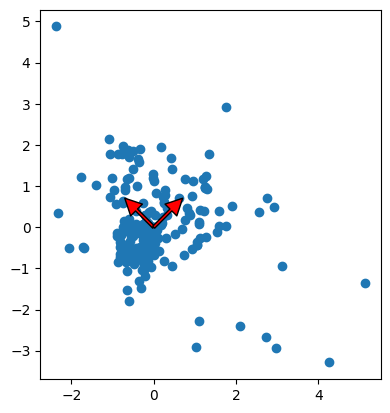

In [32]:
# Visualization code based on
# https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib
import numpy as np

# Let's take our first two dimensions, as before
data = X[:, 0:2]

mu = data.mean(axis=0)
data = (data - mu)/data.std(axis=0)
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

Let's re-plot by rotating along the first two dimensions

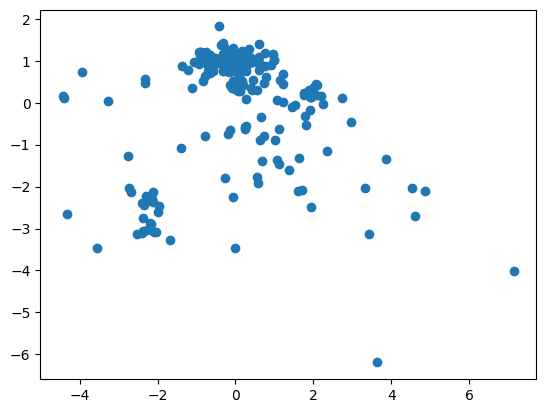

In [33]:
# Here is the transformed data along the first 2 components
plt.scatter(X2[:,0], X2[:,1])

### How Many Components? Principal Components vs Explained Variance

How much does each component explain the variance?  We can look at the `explained_variance_ratio_` to tell...

In [34]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 , 0.15609378, 0.12865138, 0.10155581,
       0.05862613, 0.04099538, 0.00709477, 0.00017876])

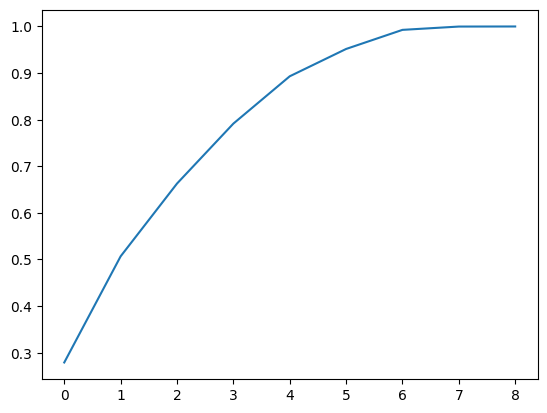

In [35]:
# See how much is contributed by the first few terms
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

... So, the first 6 components (0 through 5, of 9) give 90% explained variance.  Not too bad!

## PCA and Learning a Predictor (Classifier)

From the above, we saw how to do PCA on the overall dataset.  But let's do it more methodically as part of machine learning.  We'll start with separate training and test data.



In [36]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.20, random_state=42)

# Fit the PCA on the training data
pca = PCA(n_components=6)
pca.fit(X_train)
# and transform it
X_train_2 = pca.transform(X_train)

# Then train a simple linear regression classifier
# (tries to find the best weighted linear combination to
# match the output)
regr = linear_model.LinearRegression()
regr.fit(X_train_2, y_train)

X_train_2

array([[-1.40712977, -0.5548499 ,  0.27978336,  0.19045658, -0.68459377,
         0.02754543],
       [ 0.97583006, -0.86557172,  0.42879509, -0.49226798,  1.77175323,
         0.24376956],
       [ 0.68750686,  0.14086061, -1.70529824,  3.08716943,  0.74135314,
        -0.04003752],
       ...,
       [-0.67637945, -0.83390501,  0.76929081,  0.46784216,  1.45750402,
        -0.02251824],
       [-0.03405592,  0.56315378, -1.04661605,  0.28054165,  0.20925479,
        -0.71265347],
       [ 0.49573744, -1.2931273 ,  0.7719564 ,  1.45704714,  1.22898275,
         0.61543649]])

In [37]:
X_test_2 = pca.transform(X_test)

regr.predict(X_test_2)

regr.score(X_test_2, y_test)

0.873987227091783

So, 87.4% predictive accuracy on the test set.

How does that compare with working directly on the real data?

In [38]:
# Train and evaluate over non-dimensionality-reduced data
regr_full_data = linear_model.LinearRegression()
regr_full_data.fit(X_train, y_train)

regr_full_data.predict(X_test)
regr_full_data.score(X_test, y_test)

0.8557278202618007

Actually better!  How can that be? We not only reduced dimensions, but we removed correlation. The `LinearRegression` classifier assumes uncorrelated features.

## PCA on Spark

Thus far we've seen PCA using Scikit-Learn, which is fantastic for mid-sized data sets.

What if we have a really big Spark dataframe with our dataset?


In [39]:
%set_env SPARK_VERSION=3.5.6

env: SPARK_VERSION=3.5.6


In [40]:
## Let's install Apache Spark on Colab

!wget -nc https://downloads.apache.org/spark/spark-$SPARK_VERSION/spark-$SPARK_VERSION-bin-hadoop3.tgz
!tar xf spark-$SPARK_VERSION-bin-hadoop3.tgz
!pip install findspark

import os

os.environ["SPARK_HOME"] = "/content/spark-" + os.environ['SPARK_VERSION'] + "-bin-hadoop3"

--2025-10-27 08:06:11--  https://downloads.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.208.237, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.208.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400923510 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.6-bin-hadoop3.tgz’

spark-3.5.6-bin-had 100%[===================>] 382.35M  34.6MB/s    in 12s     

2025-10-27 08:06:23 (32.7 MB/s) - ‘spark-3.5.6-bin-hadoop3.tgz’ saved [400923510/400923510]



In [41]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql import SQLContext

spark = SparkSession.builder.appName('Clustering').getOrCreate()

In [42]:
import pandas as pd
from pyspark import SparkFiles

from pyspark.sql.types import StringType, IntegerType, DoubleType, StructField, StructType, ArrayType, MapType

# ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
schema = StructType([
        StructField("ID", IntegerType(), True),
        StructField("RefractiveIndex", DoubleType(), True),
        StructField("Na", DoubleType(), True),
        StructField("Mg", DoubleType(), True),
        StructField("Al", DoubleType(), True),
        StructField("Si", DoubleType(), True),
        StructField("K", DoubleType(), True),
        StructField("Ca", DoubleType(), True),
        StructField("Ba", DoubleType(), True),
        StructField("Fe", DoubleType(), True),
        StructField("Type", IntegerType(), True),
         ])

glass_sdf = spark.createDataFrame(\
                                  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'), \
                                  schema=schema)

glass_sdf.show(5)

+---+---------------+-----+----+----+-----+----+----+---+----+----+
| ID|RefractiveIndex|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|Type|
+---+---------------+-----+----+----+-----+----+----+---+----+----+
|  2|        1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|
|  3|        1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|
|  4|        1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|
|  5|        1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|
|  6|        1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|
+---+---------------+-----+----+----+-----+----+----+---+----+----+
only showing top 5 rows



From Spark, we need to compute  a matrix (specifically, a Row Matrix) for MLLib's linear algebra operators to work on.
Then we can call `computePrincipalComponents`.

In [43]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

M = RowMatrix(glass_sdf.select('RefractiveIndex','Na','Mg','Al','Si','K','Ca','Ba','Fe').rdd.map(\
  lambda row: Vectors.dense(list(row.asDict().values()))))

pc = M.computePrincipalComponents(6)

projected = M.multiply(pc)

projected.rows.collect()

[DenseVector([-2.2414, -13.0845, 41.5609, -45.2941, 13.1599, -2.874]),
 DenseVector([-2.2496, -13.0844, 41.9784, -45.3113, 12.9424, -2.735]),
 DenseVector([-2.4224, -12.4907, 41.8856, -44.9697, 12.9633, -2.9404]),
 DenseVector([-2.3657, -12.7196, 42.194, -45.2626, 13.0373, -3.0094]),
 DenseVector([-2.3759, -12.6138, 42.4659, -44.8585, 12.7556, -2.7378]),
 DenseVector([-2.4419, -12.6604, 42.1774, -45.2893, 13.1049, -3.0937]),
 DenseVector([-2.4752, -12.5559, 42.3667, -45.354, 13.0878, -3.1702]),
 DenseVector([-2.5805, -12.7548, 40.9867, -44.9568, 13.2216, -2.833]),
 DenseVector([-2.6058, -12.4337, 42.2918, -45.0837, 12.9134, -2.9112]),
 DenseVector([-2.4888, -12.687, 42.6949, -44.9418, 12.7993, -2.8144]),
 DenseVector([-2.6618, -12.2078, 42.4148, -45.0426, 12.8882, -2.9864]),
 DenseVector([-2.4762, -12.7681, 42.6514, -45.0687, 12.9312, -2.9495]),
 DenseVector([-2.6146, -12.426, 42.5342, -45.1934, 12.8938, -2.9914]),
 DenseVector([-2.6684, -12.268, 42.7473, -45.1203, 12.8207, -2.975]),
 

## t-SNE

For high-dimensional data, we often use t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce dimensionality.  This is a stochastic method so it doesn't always produce the same output.

t-SNE isn't supported directly in Apache Spark (there is a 3rd party extension) but it's built into SciKit-Learn.

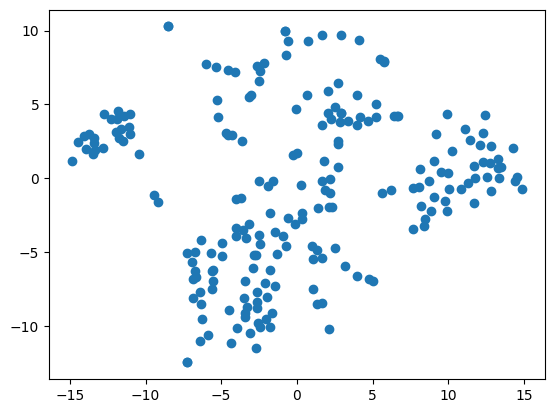

In [44]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:,0],X_embedded[:,1])

## Exercise

Let's take another popular dataset, of housing prices in Boston.

In [45]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1821735295.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


### Scaling

Don't forget to rescale your data

In [47]:
from sklearn.preprocessing import StandardScaler

# TODO
scaler = StandardScaler()
X = scaler.fit_transform(X)


Plot a heatmap to see if there is a lot of correlation.

In [50]:
# TODO: compute correlation matrix, plot heatmap
X_df = pd.DataFrame(X)
corr_matrix = X_df.corr()

print(corr_matrix)

          0         1         2         3         4         5         6   \
0   1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
1  -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
2   0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
3  -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
4   0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
5  -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
6   0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
7  -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
8   0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
9   0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
10  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
11 -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
12  0.455621

In [51]:
# We'll fit a PCA model without reducing any
# dimensions here
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

Now plot the explained variance and find the total number of dimensions that will get us to 95% or higher. Recall that this will count Dimension 0 so your count will be 1 more than the last component.

In [52]:
# TODO: explained variance ratio curve
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


In [53]:
# How many dimensions should we use, to get 95% explained variance ratio?
dimensions = np.argmax(cumulative_variance >= 0.95) + 1
dimensions

np.int64(9)

In [54]:
grader.grade('pca', dimensions)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
